In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_csv('../input/obesity-among-adults-by-country-19752016/obesity-cleaned.csv')
data['Obesity_percentage'] = data.iloc[:,3].copy()
data.drop(['Unnamed: 0','Obesity (%)'], axis=1, inplace=True)
data['Obesity_range'] = data['Obesity_percentage'].str.split().str[1]
data['Obesity_percentage'] = data['Obesity_percentage'].str.split().str[0]
data['Obesity_percentage'] = data['Obesity_percentage'].str.replace('No','0.0')
data['Obesity_percentage'] = data['Obesity_percentage'].astype('float')

# Which country have the highest obesity percentage? ---> Nauru

In [3]:
country = data.loc[:,['Country','Obesity_percentage']]
country['max_obesity'] = country.groupby('Country')['Obesity_percentage'].transform('max')
country.drop('Obesity_percentage', axis=1, inplace=True)
country = country.drop_duplicates().sort_values('max_obesity', ascending=False).head(10)

fig = px.pie(country, names='Country', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which year saw the highest obesity percentage? ---> 2016

In [4]:
year = data.loc[:,['Year','Obesity_percentage']]
year['max_obesity'] = year.groupby('Year')['Obesity_percentage'].transform('max')
year.drop('Obesity_percentage', axis=1, inplace=True)
year = year.drop_duplicates().sort_values('max_obesity', ascending=False).head(10)

fig = px.pie(year, names='Year', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Yearwise plot for max obesity percentage ---> Linearly increasing graph

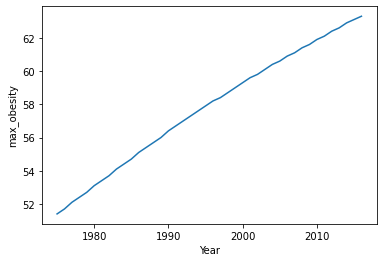

In [5]:
year = data.loc[:,['Year','Obesity_percentage']]
year['max_obesity'] = year.groupby('Year')['Obesity_percentage'].transform('max')
year.drop('Obesity_percentage', axis=1, inplace=True)
year = year.drop_duplicates().sort_values('Year')

sns.lineplot(data=year, x='Year', y='max_obesity')

# Which country saw max obesity percentage for males? ---> Nauru

In [6]:
male = data.loc[data['Sex']=='Male', ['Country','Obesity_percentage']]
male['max_obesity'] = male.groupby('Country')['Obesity_percentage'].transform('max')
male.drop('Obesity_percentage', axis=1, inplace=True)
male = male.drop_duplicates().sort_values('max_obesity', ascending=False).head(10)

fig = px.pie(male, names='Country', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which country saw max obesity percentage for females? ---> Nauru

In [7]:
female = data.loc[data['Sex']=='Female', ['Country','Obesity_percentage']]
female['max_obesity'] = female.groupby('Country')['Obesity_percentage'].transform('max')
female.drop('Obesity_percentage', axis=1, inplace=True)
female = female.drop_duplicates().sort_values('max_obesity', ascending=False).head(10)

fig = px.pie(female, names='Country', values='max_obesity', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Selecting 5 countries with highest obesity percentages

In [8]:
country = data.loc[:,['Country','Obesity_percentage']]
country['max_obesity'] = country.groupby('Country')['Obesity_percentage'].transform('max')
country.drop('Obesity_percentage', axis=1, inplace=True)
country = country.drop_duplicates().sort_values('max_obesity', ascending=False)
top_5_countries = country['Country'].head(5).tolist()
top_5_countries

['Nauru', 'Cook Islands', 'Palau', 'Marshall Islands', 'Tuvalu']

# Top 5 countries per year

In [9]:
perc = data.loc[:,["Year","Country",'Obesity_percentage']]
perc['max_obesity'] = perc.groupby([perc.Country,perc.Year])['Obesity_percentage'].transform('max')
perc.drop('Obesity_percentage', axis=1, inplace=True)
perc = perc.drop_duplicates()
#perc = perc[(perc['Year'].astype('float')>=2006.0) & (perc['Year'].astype('float')<=2011.0)]
#perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Country'].isin(top_5_countries)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Country', y="max_obesity", animation_frame="Year", 
           animation_group="Country", color="Country", hover_name="Country", range_y=[0,70])
fig.show()

It can be clearly noticed that the growth rate of obesity percentage in Palau, Cook Islands and Marshall Islands are a lot higher than Nauru despite it being the 1st one in the list.

# Comparing western and eastern countries

In [10]:
selected_countries = ['India', 'United States of America', 'Japan', 'China', 'United Kingdom of Great Britain and Northern Ireland']
perc = data.loc[:,["Year","Country",'Obesity_percentage']]
perc['max_obesity'] = perc.groupby([perc.Country,perc.Year])['Obesity_percentage'].transform('max')
perc.drop('Obesity_percentage', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.loc[perc['Country'].isin(selected_countries)]
perc = perc.sort_values("Year")
fig=px.bar(perc,x='Country', y="max_obesity", animation_frame="Year", 
           animation_group="Country", color="Country", hover_name="Country", range_y=[0,40])
fig.show()

Growth rate of obesity in the western countries is a lot higher than the eastern countries.